Calculating % of people being hospitalized, ICU and dead 

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [10]:
# Load and prepare the data
hospital_and_icu = pd.read_csv('COVID-19_ziekenhuis_ic_opnames_per_leeftijdsgroep.csv', sep=';')
hospital_and_icu['Date_of_statistics_week_start'] = pd.to_datetime(hospital_and_icu['Date_of_statistics_week_start'])
hospital_and_icu.set_index('Date_of_statistics_week_start', inplace=True)
hospital_and_icu = hospital_and_icu[hospital_and_icu['Age_group'] != 'Unknown']

# Calculate the ratios
# Hospital
hospital = hospital_and_icu.groupby([pd.Grouper(freq='D'), 'Age_group']).sum()['Hospital_admission_notification'].unstack()
alpha_end = '2020-09-01'
hospital = hospital[hospital.index <= alpha_end]
total_hospital = hospital.sum(axis=0).sum(axis=0)
hospital_ratios = pd.DataFrame(hospital.sum(axis=0) / total_hospital, columns=['hospital_ratio'])
hospital_ratios.index.name = 'age_group'
hospital_ratios.to_csv('hospital_ratios.csv')

# ICU
icu = hospital_and_icu.groupby([pd.Grouper(freq='D'), 'Age_group']).sum()['IC_admission_notification'].unstack()
icu = icu[icu.index <= alpha_end]
total_icu = icu.sum(axis=0).sum(axis=0)
icu_ratios = pd.DataFrame(icu.sum(axis=0) / total_icu, columns=['icu_ratio'])
icu_ratios.index.name = 'age_group'
icu_ratios.to_csv('icu_ratios.csv')

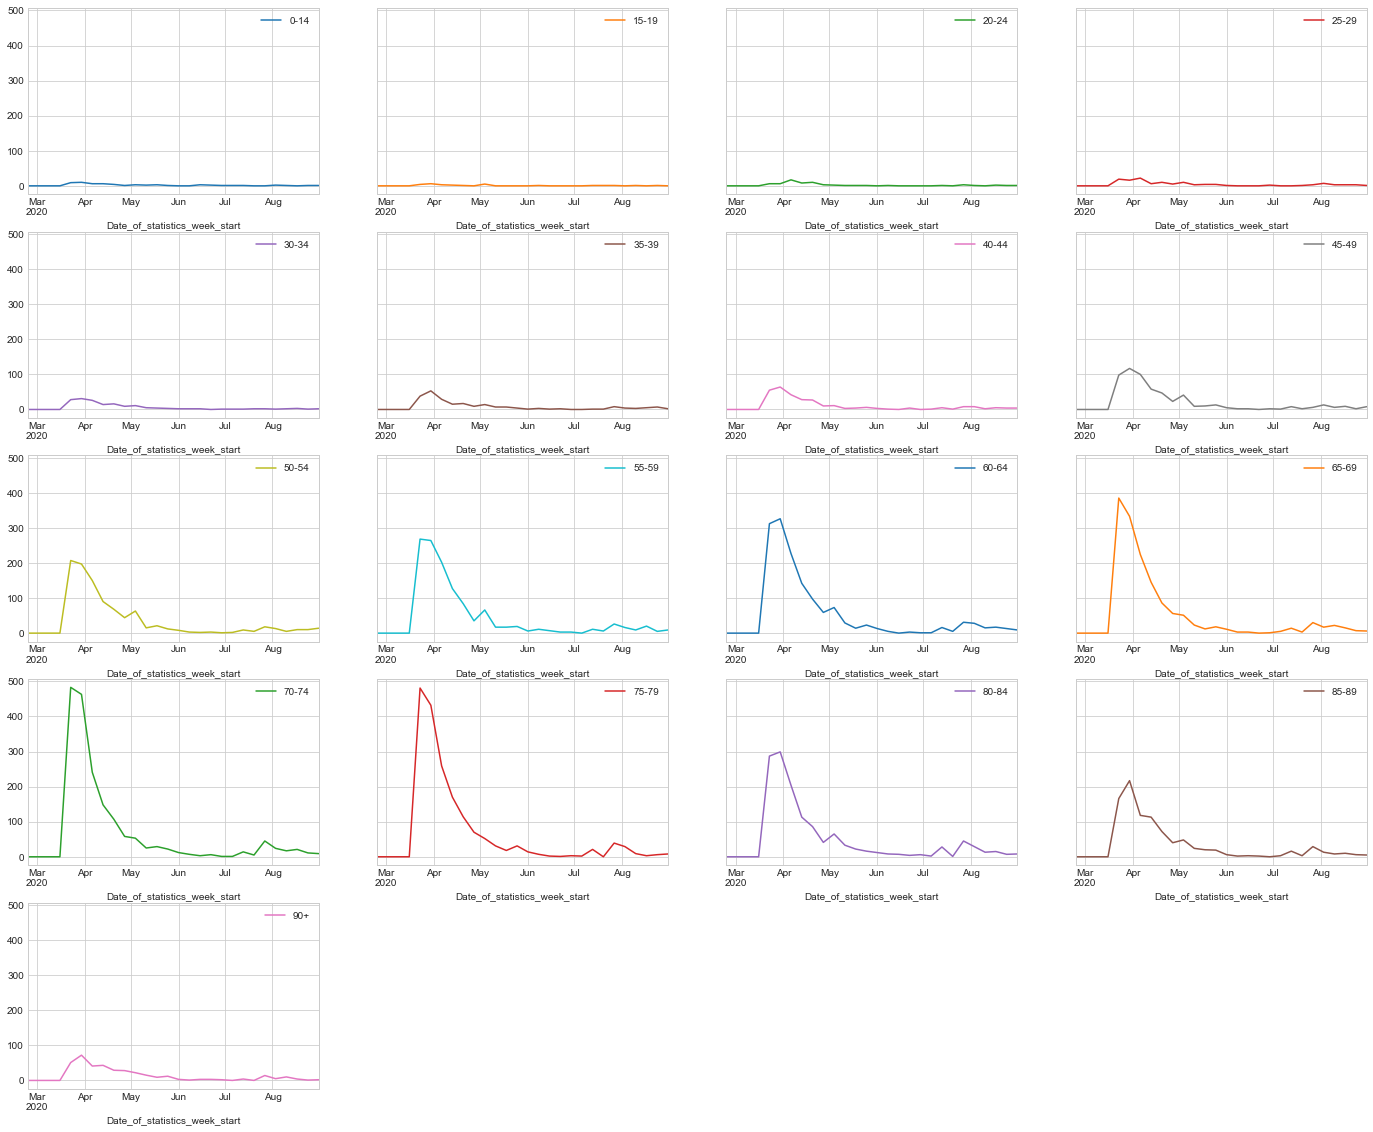

In [4]:
hospital.plot(subplots=True, sharey=True, sharex=False, layout=(6,4), figsize=(6 * 4, 4 * 6));

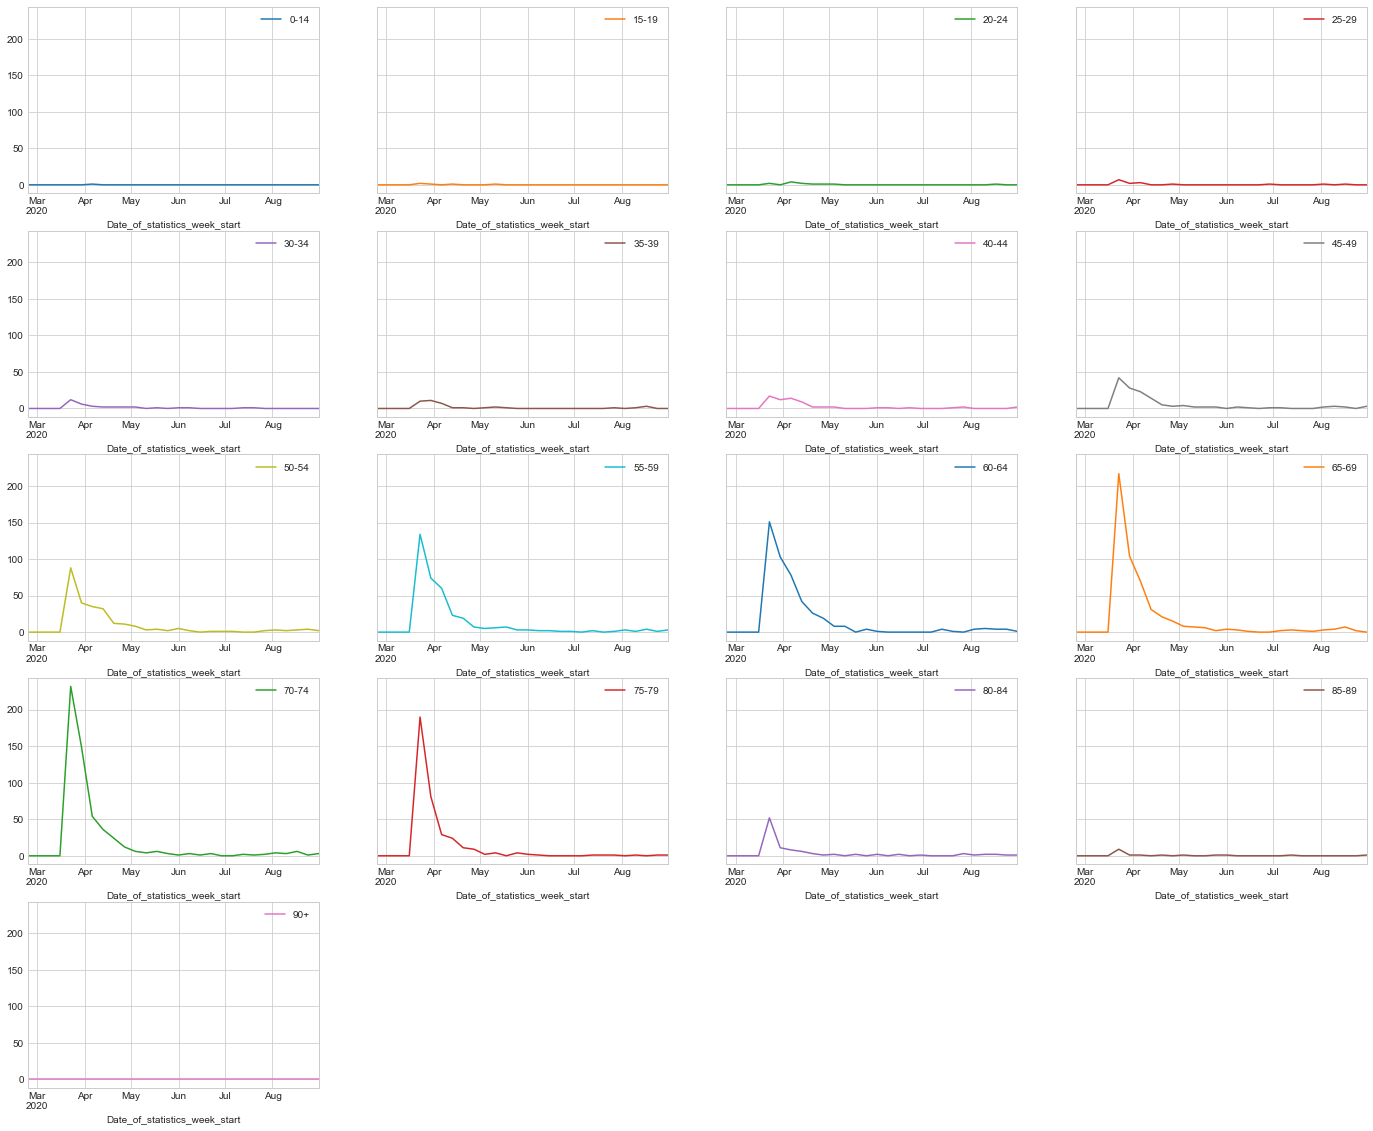

In [5]:
icu.plot(subplots=True, sharey=True, sharex=False, layout=(6,4), figsize=(6 * 4, 4 * 6));